# Glass Identification Dataset
## Problem Statement:

#### The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



#### The chemical compositions are measured as the weight percent in corresponding oxide.

### Attribute Information-

Id number: 1 to 214

RI: refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

### Type of glass: (class attribute)

1- building_windows_float_processed

2- building_windows_non_float_processed

3- vehicle_windows_float_processed

4- vehicle_windows_non_float_processed (none in this database)

5- containers

6- tableware

7- headlamps


There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass


#### This is a classification problem to predict the category of glass 

In [1]:
# Import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()

,1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0,0.1,1.1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


The dataset does not have headers. So after adding headers

In [4]:
df = pd.read_csv('glasses.csv')
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Cat
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


The dataset has 214 rows(observations) and 11 columns. The Cat column is the dependant variable and the rest are independant variables. 

The Cat column contains various categories of glass hich are suitable for windows, containers, tableware and headlights

The id column is on the basis of the index, so , there is no importance for this column. There is no point in having the column. So it can be dropped

# EDA

In [5]:
#Checking the shape of the dataset
df.shape

(214, 11)

The dataset has 214 rows and 11 columns. 

Out of 11 columns 10 are features and 1 is label(target)

In [6]:
#Checking the dtatypes present in the dataset
df.dtypes

Id       int64
RI     float64
Na     float64
Mg     float64
Al     float64
Si     float64
K      float64
Ca     float64
Ba     float64
Fe     float64
Cat      int64
dtype: object

There are only 2 datatypes in the given dataset, integer and float

In [7]:
#Checking the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Cat     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


There are no null rows or columns

In [8]:
#Checking the number of unique values present in each feature
df.nunique()

Id     214
RI     178
Na     142
Mg      94
Al     118
Si     133
K       65
Ca     143
Ba      34
Fe      32
Cat      6
dtype: int64

In [9]:
#Standardizing the column names
df.columns = [col.lower() for col in df.columns]

In [10]:
df.head(1)

,id,ri,na,mg,al,si,k,ca,ba,fe,cat
0,1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


# Data Visualizations

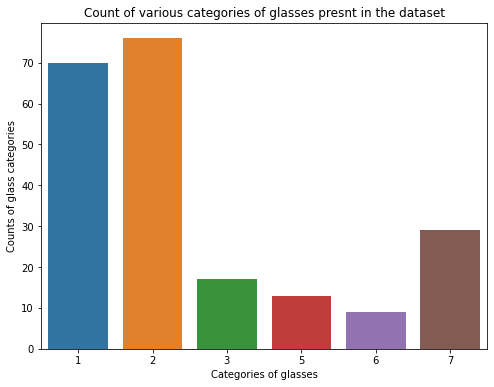

In [11]:
#Checking the distribution of the various classes of glasses presnt in the dataset
plt.figure(figsize=(8,6))
plt.title('Count of various categories of glasses presnt in the dataset')
sns.countplot(x=df['cat'])
plt.xlabel('Categories of glasses')
plt.ylabel('Counts of glass categories')
plt.show()

Most of the glasses in the datset are building windows glasses

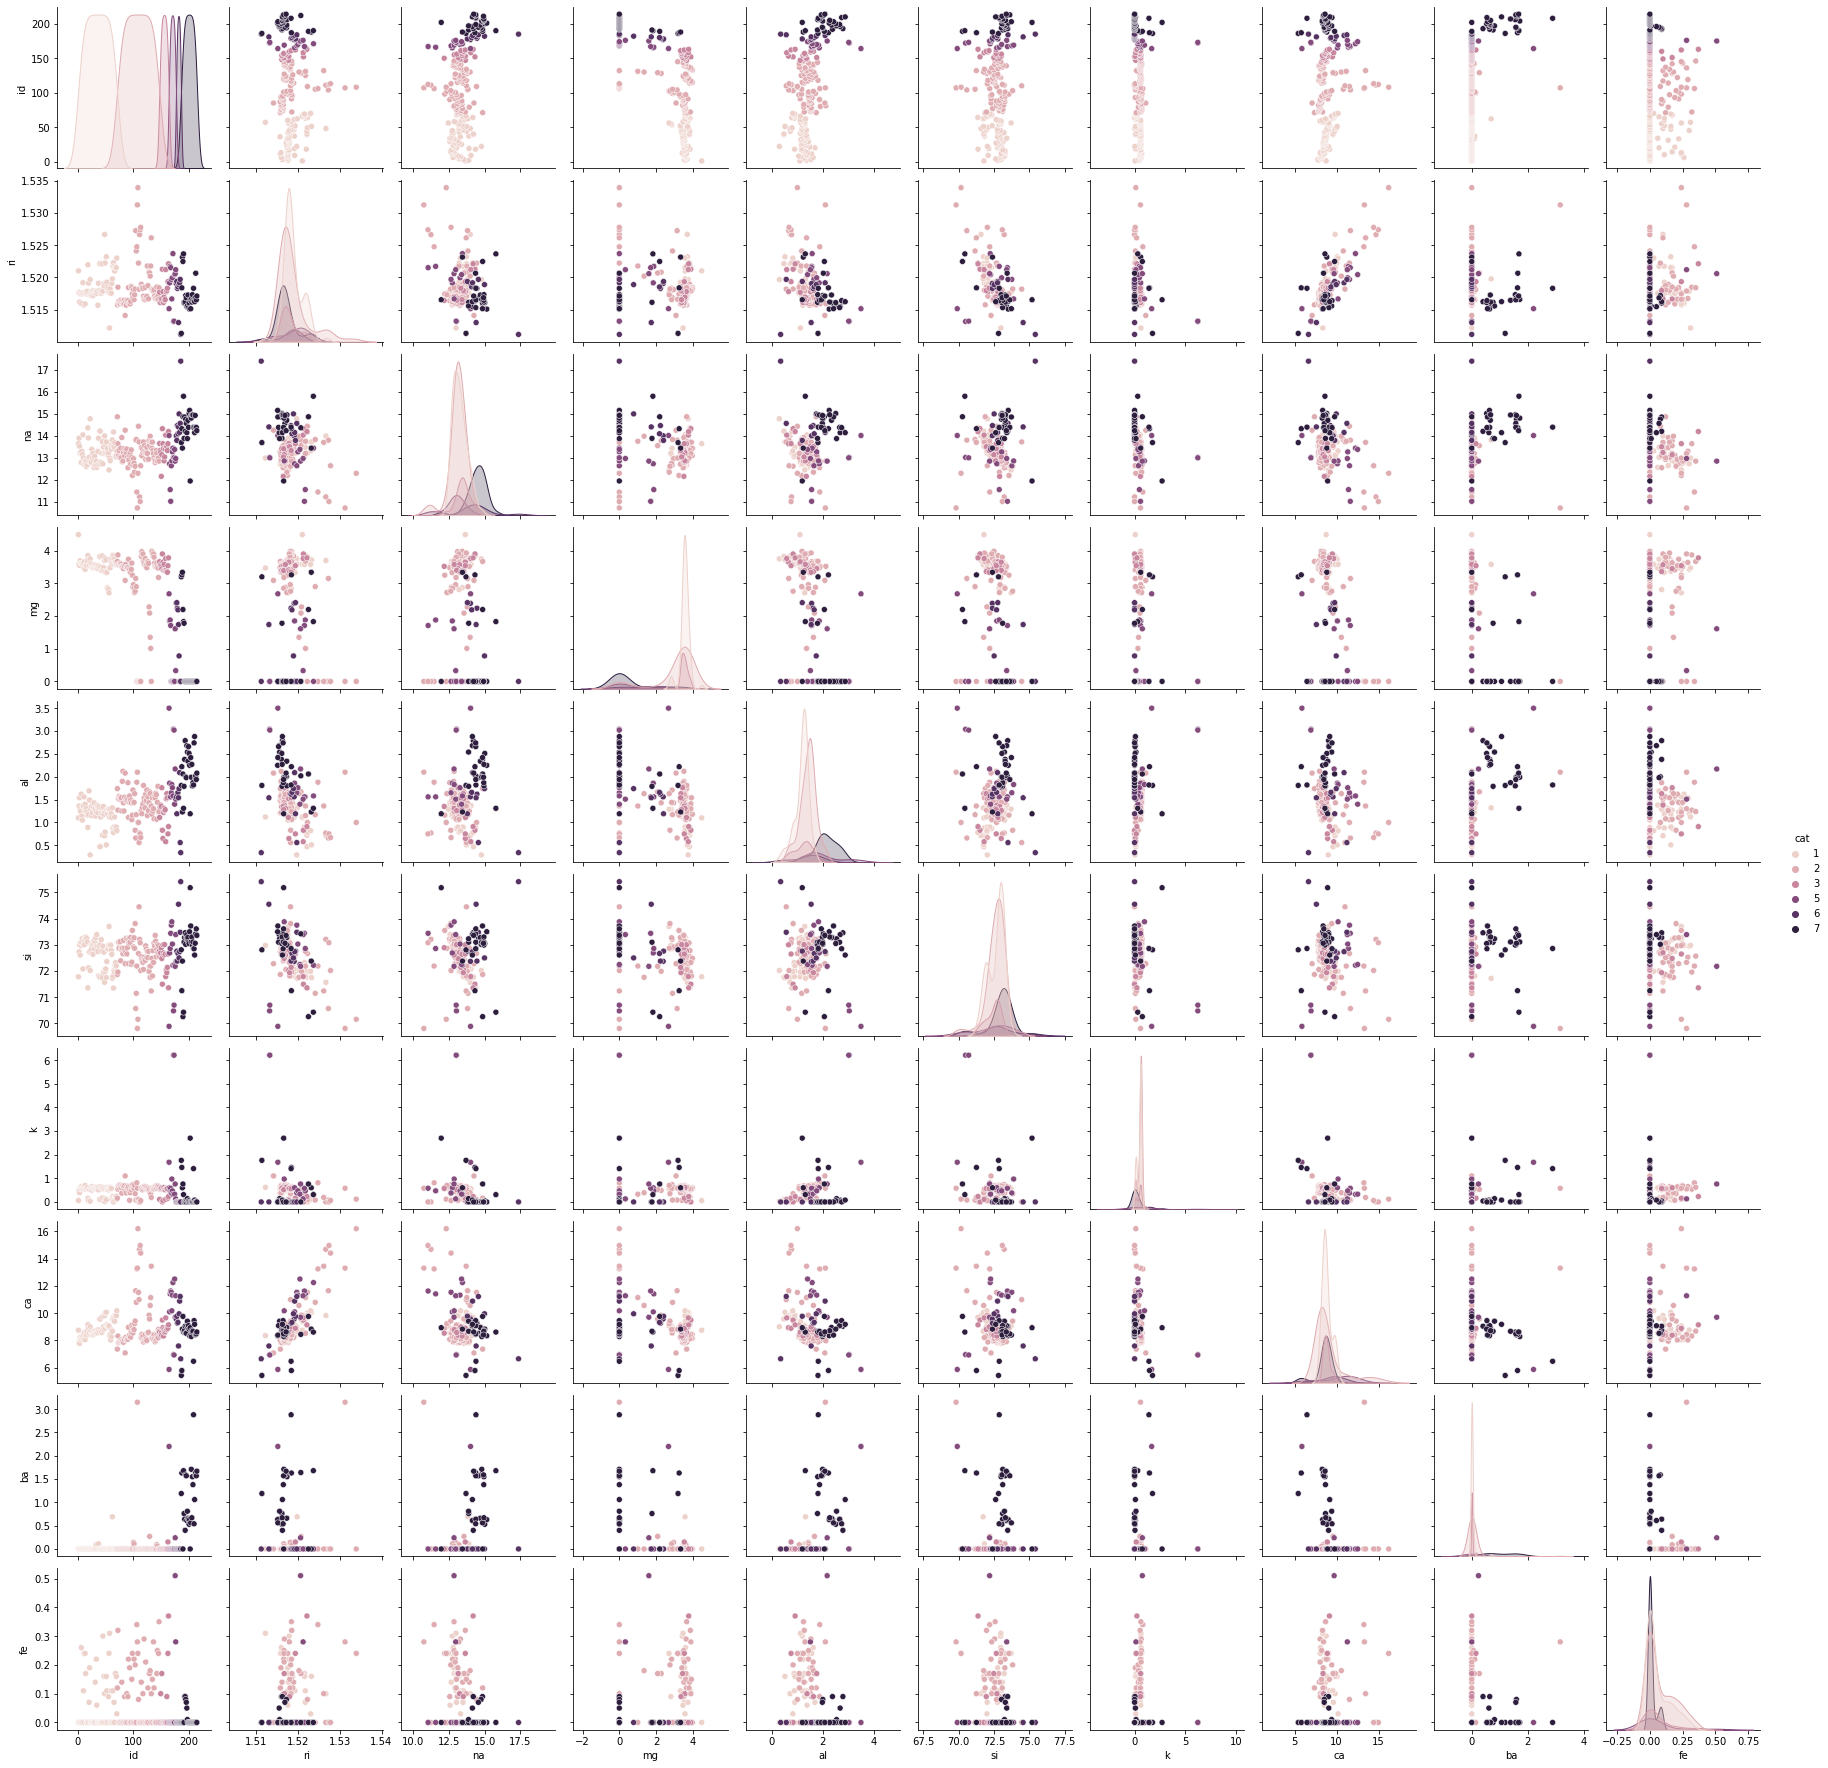

In [12]:
sns.pairplot(df,hue='cat')

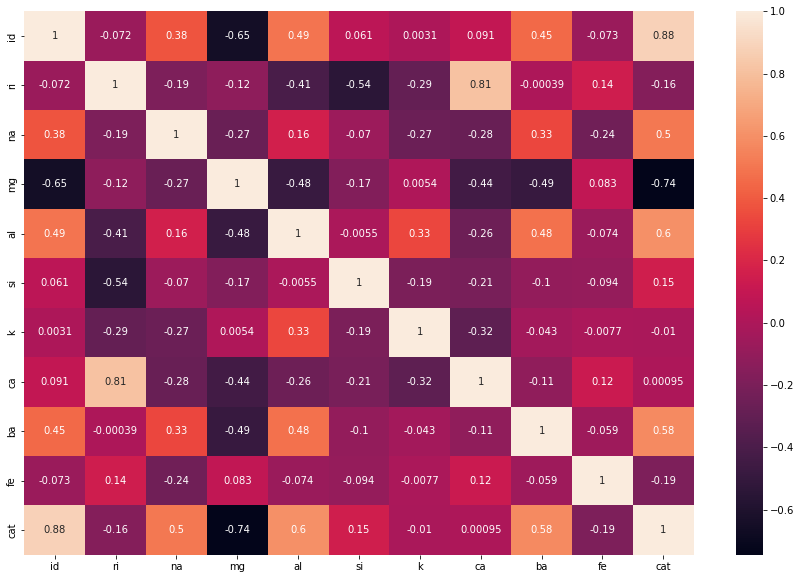

In [13]:
# Checking the correlation of the dependant and independnt variables
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

Observations:
1. We can see both positive and negative correlations in the heatmap 
2. mg shows a high negative correlation with the cat column.
3. ri and ca also show a high positive correlation between themselves

In [14]:
cor = df.corr()
cor['cat']

id     0.877357
ri    -0.164237
na     0.502898
mg    -0.744993
al     0.598829
si     0.151565
k     -0.010054
ca     0.000952
ba     0.575161
fe    -0.188278
cat    1.000000
Name: cat, dtype: float64

Positive correlation exists between cat and  
1. na
2. al
3. si
4. ca
5. ba

Negative correlation exists between cat and  
1. ri
2. mg
3. k
4. fe


In [15]:
# Dropping unnecessary columns
df.drop('id',axis=1, inplace=True)

In [16]:
df.head(2)

,ri,na,mg,al,si,k,ca,ba,fe,cat
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


# Checking for outliers

<AxesSubplot:xlabel='ri'>

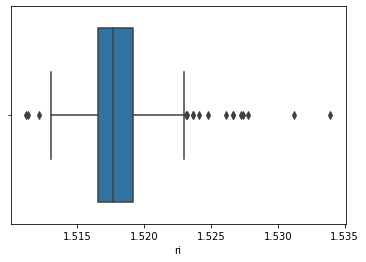

In [17]:
#Checking for outliers in the ri column
sns.boxplot(df['ri'])

<AxesSubplot:xlabel='na'>

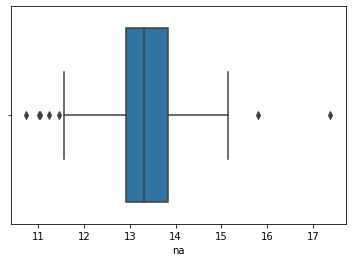

In [18]:
#Checking for outliers in the na column
sns.boxplot(df['na'])

<AxesSubplot:xlabel='mg'>

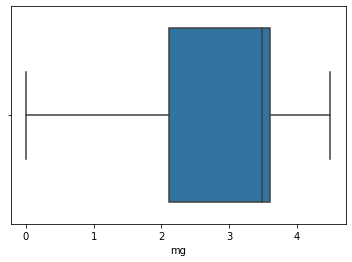

In [19]:
#Checking for outliers in the mg column
sns.boxplot(df['mg'])

<AxesSubplot:xlabel='al'>

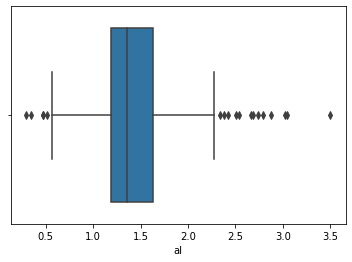

In [20]:
#Checking for outliers in the al column
sns.boxplot(df['al'])

<AxesSubplot:xlabel='si'>

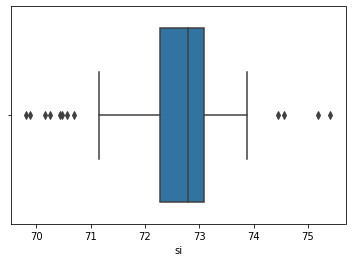

In [21]:
#Checking for outliers in the si column
sns.boxplot(df['si'])

<AxesSubplot:xlabel='k'>

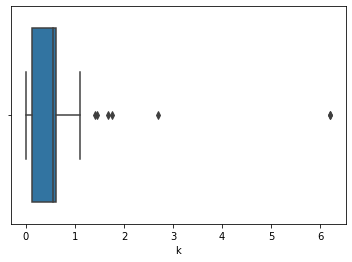

In [22]:
#Checking for outliers in the k column
sns.boxplot(df['k'])

<AxesSubplot:xlabel='ca'>

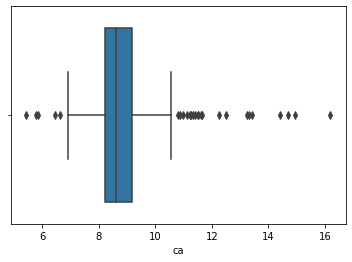

In [23]:
#Checking for outliers in the ca column
sns.boxplot(df['ca'])

<AxesSubplot:xlabel='ba'>

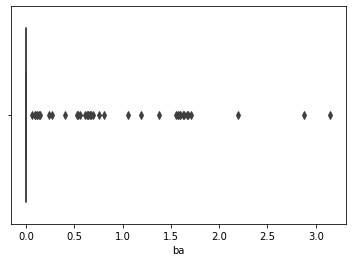

In [24]:
#Checking for outliers in the ba column
sns.boxplot(df['ba'])

<AxesSubplot:xlabel='fe'>

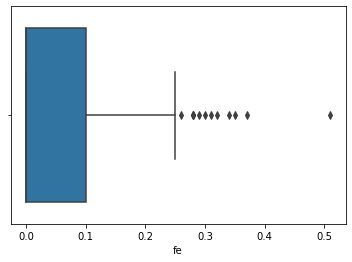

In [25]:
#Checking for outliers in the fe column
sns.boxplot(df['fe'])

All the features except the mg column have outliers

In [26]:
df['mg'].unique()

array([4.49, 3.6 , 3.55, 3.69, 3.62, 3.61, 3.58, 3.46, 3.66, 3.43, 3.56,
       3.59, 3.54, 3.67, 3.85, 3.73, 3.75, 3.57, 3.5 , 3.48, 3.52, 3.49,
       3.47, 3.45, 3.53, 3.82, 3.42, 3.39, 3.84, 3.37, 3.7 , 3.77, 3.35,
       3.72, 3.33, 2.87, 2.84, 2.81, 2.71, 3.74, 3.86, 3.81, 3.65, 3.87,
       3.09, 3.44, 3.41, 3.34, 3.25, 2.88, 2.96, 2.85, 2.72, 2.76, 3.15,
       2.9 , 0.  , 3.83, 3.97, 3.89, 3.9 , 3.68, 3.64, 3.76, 2.28, 2.09,
       1.35, 1.01, 3.98, 3.93, 3.8 , 3.63, 3.51, 3.18, 3.4 , 3.36, 3.78,
       2.68, 1.85, 1.88, 1.71, 1.61, 0.33, 2.39, 2.41, 2.24, 2.19, 1.74,
       0.78, 3.2 , 3.26, 2.2 , 1.83, 1.78])

# Removing Outliers

1. Z-score method
2. IQR method

## Z-Score method

In [27]:
df.columns

Index(['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'cat'], dtype='object')

In [28]:
olc = df[['ri','na','al','si','k','ca','ba','fe']]

In [29]:
from scipy.stats import zscore
zs = np.abs(zscore(olc))
zs

,ri,na,al,si,k,ca,ba,fe
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [30]:
# Creating new dataframe
df_zs = df[(zs<3).all(axis=1)]
df_zs.head()

,ri,na,mg,al,si,k,ca,ba,fe,cat
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [31]:
df.shape

(214, 10)

In [32]:
df_zs.shape

(194, 10)

In [33]:
#Checking data loss after performing z-score
data_loss = (214-194)/214*100
data_loss

9.345794392523365

There is a 9% dataloss with z-score method

## IQR method

In [34]:
# 1st quantile
Q1 = olc.quantile(0.25)
# 3rd quantile
Q3 = olc.quantile(0.75)
# IQR
IQR = Q3 - Q1

df_iqr = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
df.shape

(214, 10)

In [36]:
df_iqr.shape

(136, 10)

In [37]:
data_loss = (214-136)/214*100
data_loss

36.44859813084112

There is a 36% loss in data with IQR method.

So, i am using the Z-Score method

# Handling Skewness

In [38]:
#Checking the skewness
df_zs.skew()

ri     0.952733
na     0.371482
mg    -1.528849
al     0.658259
si    -0.425450
k      0.303175
ca     1.077962
ba     3.188587
fe     1.486479
cat    1.284007
dtype: float64

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed

If the skewness is less than -1 or greater than 1, the data are highly skewed

<AxesSubplot:xlabel='ri', ylabel='Count'>

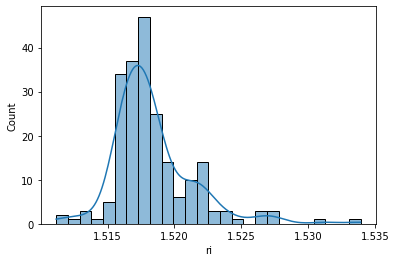

In [39]:
#Skewness in the ri column
sns.histplot(x=df['ri'],kde=True)

<AxesSubplot:xlabel='na', ylabel='Count'>

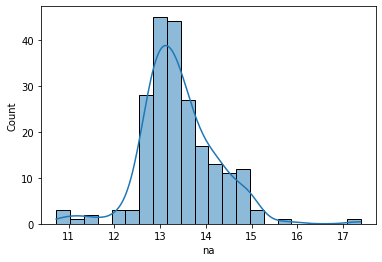

In [40]:
#Skewness in the ri column
sns.histplot(x=df['na'],kde=True)

<AxesSubplot:xlabel='mg', ylabel='Count'>

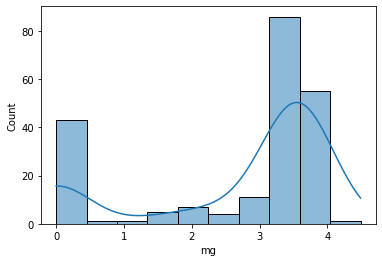

In [41]:
#Skewness in the mg column
sns.histplot(x=df['mg'],kde=True)

<AxesSubplot:xlabel='al', ylabel='Count'>

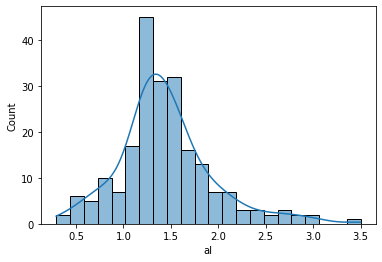

In [42]:
#Skewness in the al column
sns.histplot(x=df['al'],kde=True)

<AxesSubplot:xlabel='si', ylabel='Count'>

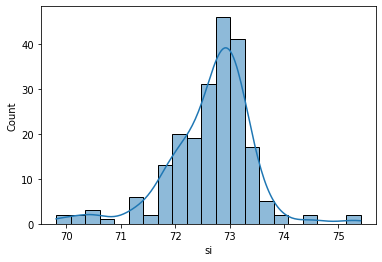

In [43]:
#Skewness in the si column
sns.histplot(x=df['si'],kde=True)

<AxesSubplot:xlabel='k', ylabel='Count'>

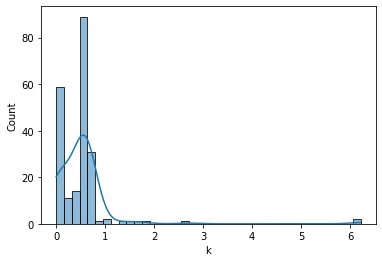

In [44]:
#Skewness in the k column
sns.histplot(x=df['k'],kde=True)

<AxesSubplot:xlabel='ca', ylabel='Count'>

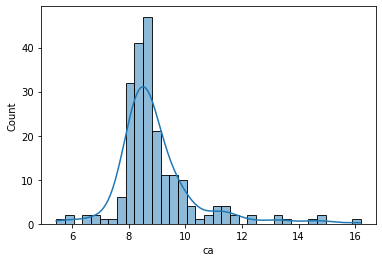

In [45]:
#Skewness in the ca column
sns.histplot(x=df['ca'],kde=True)

<AxesSubplot:xlabel='ba', ylabel='Count'>

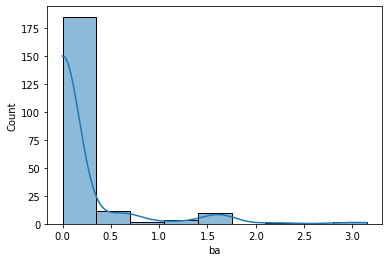

In [46]:
#Skewness in the ba column
sns.histplot(x=df['ba'],kde=True)

<AxesSubplot:xlabel='fe', ylabel='Count'>

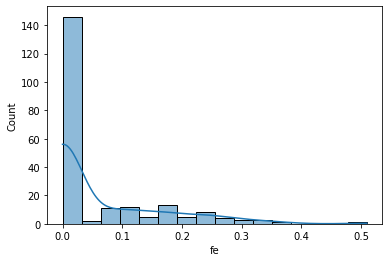

In [47]:
#Skewness in the fe column
sns.histplot(x=df['fe'],kde=True)

#### mg, ba and fe are highly skewed

In [48]:
df['mg']

0      4.49
1      3.60
2      3.55
3      3.69
4      3.62
       ... 
209    0.00
210    0.00
211    0.00
212    0.00
213    0.00
Name: mg, Length: 214, dtype: float64

In [49]:
np.sqrt(df['mg'])

0      2.118962
1      1.897367
2      1.884144
3      1.920937
4      1.902630
         ...   
209    0.000000
210    0.000000
211    0.000000
212    0.000000
213    0.000000
Name: mg, Length: 214, dtype: float64

<AxesSubplot:xlabel='mg', ylabel='Count'>

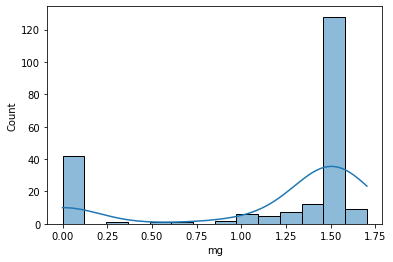

In [50]:
sns.histplot(np.log(df['mg']+1),kde=True)

In [51]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [52]:
skewed_features = ["mg","ba","fe"]

In [53]:
df_zs[skewed_features] = scaler.fit_transform(df_zs[skewed_features].values)
df_zs[skewed_features].head()

,mg,ba,fe
0,2.295067,-0.429499,-0.677737
1,0.587338,-0.429499,-0.677737
2,0.507711,-0.429499,-0.677737
3,0.734829,-0.429499,-0.677737
4,0.619650,-0.429499,-0.677737


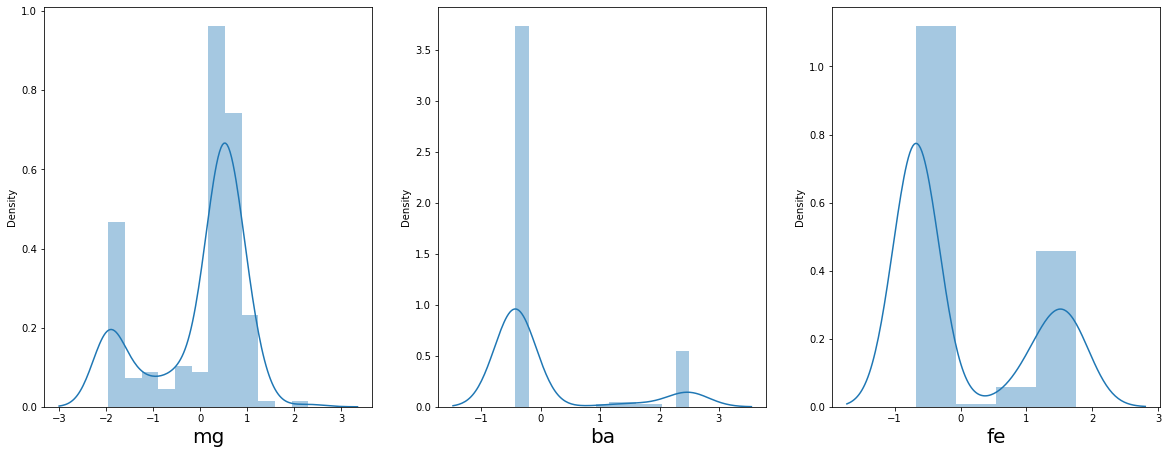

In [54]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_zs[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [55]:
df_zs

,ri,na,mg,al,si,k,ca,ba,fe,cat
0,1.52101,13.64,2.295067,1.10,71.78,0.06,8.75,-0.429499,-0.677737,1
1,1.51761,13.89,0.587338,1.36,72.73,0.48,7.83,-0.429499,-0.677737,1
2,1.51618,13.53,0.507711,1.54,72.99,0.39,7.78,-0.429499,-0.677737,1
3,1.51766,13.21,0.734829,1.29,72.61,0.57,8.22,-0.429499,-0.677737,1
4,1.51742,13.27,0.619650,1.24,73.08,0.55,8.07,-0.429499,-0.677737,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,-1.947674,2.74,72.85,0.00,9.45,2.473388,-0.677737,7
209,1.51623,14.14,-1.947674,2.88,72.61,0.08,9.18,2.497782,-0.677737,7
210,1.51685,14.92,-1.947674,1.99,73.06,0.00,8.40,2.498738,-0.677737,7
211,1.52065,14.36,-1.947674,2.02,73.42,0.00,8.44,2.498753,-0.677737,7


In [56]:
df_zs.skew()

ri     0.952733
na     0.371482
mg    -1.026009
al     0.658259
si    -0.425450
k      0.303175
ca     1.077962
ba     1.971225
fe     0.858856
cat    1.284007
dtype: float64

# Preprocessimg

### Splitting the data into X and y

In [57]:
#Separating dependant and independant columns
X=df.drop('cat',axis=1)
y=df['cat']

In [58]:
X.head(2)

,ri,na,mg,al,si,k,ca,ba,fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [59]:
y.head(2)

0    1
1    1
Name: cat, dtype: int64

# Oversampling

The dataset is imbalanced. So we are using SMOTE

In [60]:
import imblearn

In [61]:
# Balancing the data using oversampling

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [62]:
y.value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: cat, dtype: int64

In [63]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X), columns=X.columns)

# Modelling

#### Finding the best random_state

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =i)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.9239130434782609  on Random_state  63


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
fin_acc=0
fin_rs=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state =i)
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>fin_acc:
        fin_acc=acc
        fin_rs=i
print("Best accuracy is ",fin_acc," on Random_state ",fin_rs)

Best accuracy is  0.9782608695652174  on Random_state  44


In [66]:
## Creating Train Test Split again with new random state
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = fin_rs)

# Classification

In [67]:
#importing the classification algorithms.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

## Logistic Regression

In [68]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
log_reg_pred=lr.predict(X_test)
print("Accuracy of the model with Logistic Regressio is: ",accuracy_score(y_test, log_reg_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, log_reg_pred))

Accuracy of the model with Logistic Regressio is:  68.47826086956522 % 

Confusion matrix is: 
 [[10  3  1  0  0  0]
 [ 5  3  3  0  0  0]
 [ 4  6  7  0  0  0]
 [ 0  2  0 16  0  3]
 [ 0  0  0  0 14  0]
 [ 1  0  0  0  1 13]]


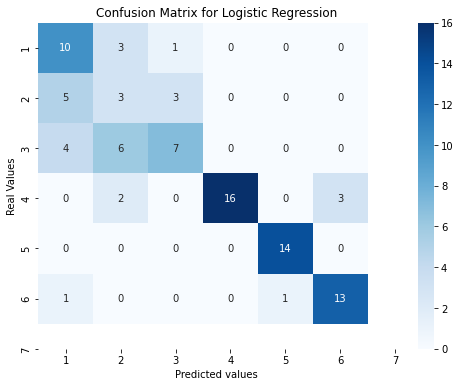

In [69]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,log_reg_pred)

x_labels = ['1','2','3','4','5','6','7']
y_labels = ['1','2','3','4','5','6','7']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Decison Tree Classifier

In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
print("Accuracy of the model with Decision tree Classifier is: ",accuracy_score(y_test, dtc_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, dtc_pred))

Accuracy of the model with Decision tree Classifier is:  92.3913043478261 % 

Confusion matrix is: 
 [[14  0  0  0  0  0]
 [ 1  7  3  0  0  0]
 [ 2  0 15  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 14]]


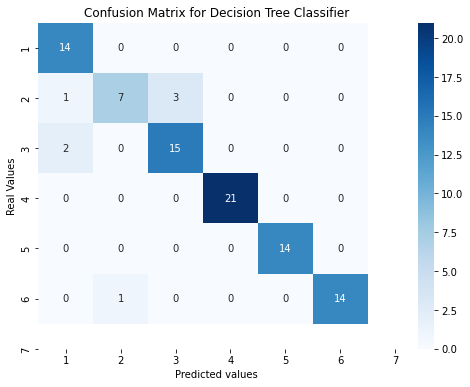

In [71]:
# Confusion matrix for Decision Tree Classifier
cm = confusion_matrix(y_test,dtc_pred)

x_labels = ['1','2','3','4','5','6','7']
y_labels = ['1','2','3','4','5','6','7']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [72]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Accuracy of the model with Random Forest Classifier is: ",accuracy_score(y_test, rfc_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, rfc_pred))

Accuracy of the model with Random Forest Classifier is:  96.73913043478261 % 

Confusion matrix is: 
 [[13  1  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0  0 17  0  0  0]
 [ 0  0  0 20  0  1]
 [ 0  0  0  0 14  0]
 [ 1  0  0  0  0 14]]


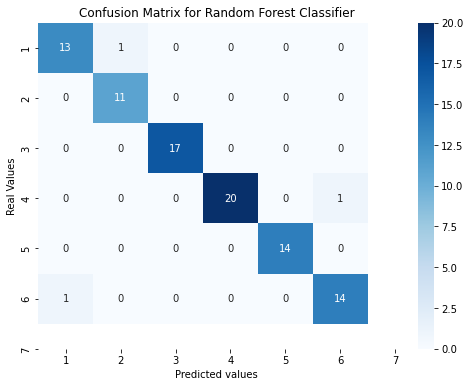

In [73]:
# Confusion matrix for Random Forest Classifier
cm = confusion_matrix(y_test,rfc_pred)

x_labels = ['1','2','3','4','5','6','7']
y_labels = ['1','2','3','4','5','6','7']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# KNN Classifier

In [74]:
knn = KNN()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("Accuracy of the model with KNN Classifier is: ",accuracy_score(y_test, knn_pred)*100,'%', '\n')
print("Confusion matrix is: \n", confusion_matrix(y_test, knn_pred))

Accuracy of the model with KNN Classifier is:  90.21739130434783 % 

Confusion matrix is: 
 [[12  1  1  0  0  0]
 [ 0  9  2  0  0  0]
 [ 2  0 15  0  0  0]
 [ 0  0  0 20  0  1]
 [ 0  0  0  0 14  0]
 [ 1  1  0  0  0 13]]


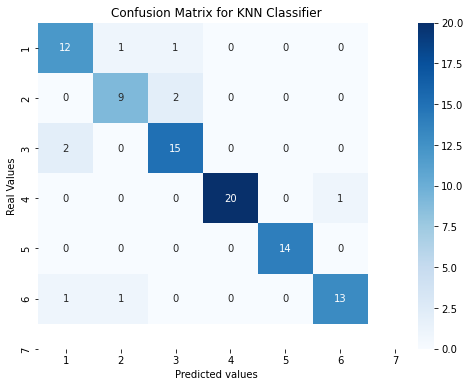

In [75]:
# Confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,knn_pred)

x_labels = ['1','2','3','4','5','6','7']
y_labels = ['1','2','3','4','5','6','7']

f , ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot = True, fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_labels,
yticklabels=y_labels)

plt.xlabel("Predicted values")
plt.ylabel("Real Values")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Cross Validation of the models

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
# Cross Validation score for Logistic Regression 
print('The accuracy of the Logistic Regression Model with a cross validation of 10 is:',cross_val_score(lr,X,y,cv=10).mean())

The accuracy of the Logistic Regression Model with a cross validation of 10 is: 0.706328502415459


In [78]:
# Cross Validation score for Decison Tree Classifier 
print('The accuracy of the Decison Tree Classifier with a cross validation of 10 is:',cross_val_score(dtc,X,y,cv=10).mean())

The accuracy of the Decison Tree Classifier with a cross validation of 10 is: 0.8377294685990337


In [79]:
# Cross Validation score for Random Forest Classifier 
print('The accuracy of the Random Forest Classifier with a cross validation of 10 is:',cross_val_score(rfc,X,y,cv=10).mean())

The accuracy of the Random Forest Classifier with a cross validation of 10 is: 0.895024154589372


In [80]:
# Cross Validation score for KNN Classifier 
print('The accuracy of the Decison Tree Classifier with a cross validation of 10 is:',cross_val_score(knn,X,y,cv=10).mean())

The accuracy of the Decison Tree Classifier with a cross validation of 10 is: 0.8379710144927536


### Random Forest Classifier is the best model as per the stats

# Hyper parameter tuning

Tuning the Random FOrest Classifier

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
params = {'max_depth': [2,3,4,5,6],'criterion' :['gini', 'entropy', 'log_loss'],'n_estimators': [50,100,200,300,400,500,600]}

In [83]:
rfcgscv = GridSearchCV(estimator = rfc, cv=10,param_grid = params, n_jobs = -1, verbose = 2, return_train_score=True)
rfcgscv.fit(X_train, y_train)

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200, 300, 400, 500, 600]},
             return_train_score=True, verbose=2)

In [85]:
rfcgscv.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 50}

In [86]:
glass_cat = RandomForestClassifier(criterion='entropy',max_depth=6, n_estimators=50)
glass_cat.fit(X_train, y_train)
pred = glass_cat.predict(X_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is : ',acc*100)

Accuracy is :  95.65217391304348


# Saving the model

In [99]:
import pickle
pickle.dump(glass_cat,open('Model.pkl','wb'))